## Diagramas de Penrose 

# Librerias

In [1]:
%pip install numpy
%pip install matplotlib

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Times New Roman'

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: numpy in c:\users\alekey ruiz\appdata\local\programs\python\python311\lib\site-packages (1.25.2)




[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Diagrama de Penrose para el Espacio de Minkowski 

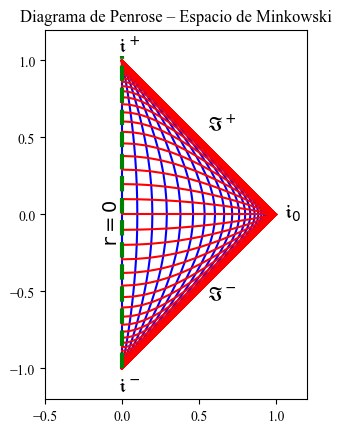

In [ ]:
def coord(t, r):
    T = 0.5 * (np.tanh(t + r) + np.tanh(t - r))
    X = 0.5 * (np.tanh(t + r) - np.tanh(t - r))
    return T, X

# Configuración de la figura
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlim([-1.2, 1.2])
ax.set_ylim([-1.2, 1.2])

# Curvas azules: líneas de r constante
for r in np.arange(0, 5.1, 0.1):
    T_list = []
    X_list = []
    for t in np.arange(-10, 10.1, 0.1):
        T_aux, X_aux = coord(t, r)
        T_list.append(T_aux)
        X_list.append(X_aux)
    ax.plot(X_list, T_list, color='blue')

# Curvas rojas: líneas de t constante
for t in np.arange(-5, 5.1, 0.1):
    T_list = []
    X_list = []
    for r in np.arange(0, 5.1, 0.1):
        T_aux, X_aux = coord(t, r)
        T_list.append(T_aux)
        X_list.append(X_aux)
    ax.plot(X_list, T_list, color='red')

#Caso r = 0

ax.plot([0, 0], [-1, 1.03], color='green', linestyle='--', linewidth=3)

# Texto
ax.text(1.05, -0.025, r'$\mathfrak{i}_0$', fontsize=14)
ax.text(-0.025, 1.05, r'$\mathfrak{i}^+$', fontsize=14)
ax.text(-0.025, -1.15, r'$\mathfrak{i}^-$', fontsize=14)
ax.text(0.55, 0.55, r'$\mathfrak{I}^+$', fontsize=14)
ax.text(0.55, -0.55, r'$\mathfrak{I}^-$', fontsize=14)
ax.text(-0.125,-0.185,r'$\mathtt{r}=0$',fontsize=14,rotation = 'vertical')

ax.set_xlim(xmin=-0.5)
ax.set_xlabel('Espacial (X)',fontsize=12)
ax.set_ylabel('Temporal (T)',fontsize=12)

plt.title("Diagrama de Penrose – Espacio de Minkowski")
plt.grid(False)
plt.show()

# Diagrama de Penrose para el Espacio de Schwarzschild

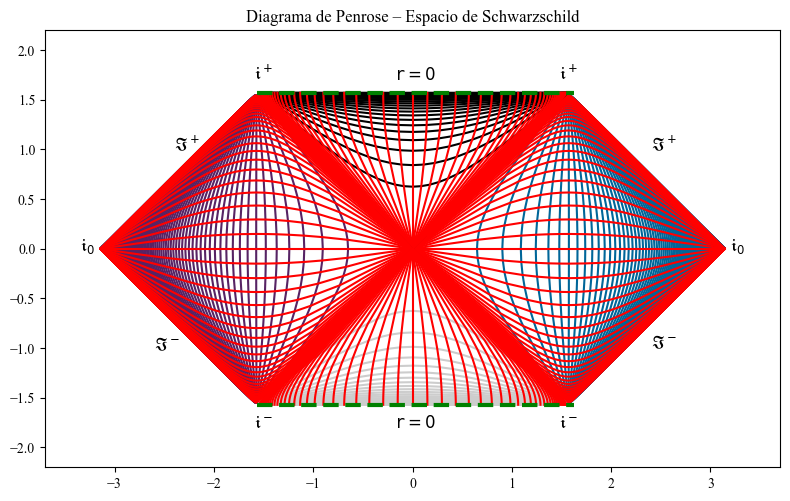

In [ ]:
# Configuración inicial
dr = 0.04
dt = 0.3
r_limite = 15
t_limite = 9
escala = 3.7

fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect('equal')
ax.set_xlim(-escala, escala)
ax.set_ylim(-escala, escala)

# Función para transformar coordenadas (usada en todas las zonas)
def coord_transform(T, X):
    p = X + T
    q = -X + T
    u = np.arctan(p)
    v = np.arctan(q)
    return u + v, u - v  # tao, R

# Zona I:  Universo Principal
for r in np.arange(1.0000001, r_limite, dr):
    espacio = []
    tiempo = []
    for t in np.arange(-t_limite, t_limite, dt):
        X = np.sqrt(r - 1) * np.exp(0.5 * r) * np.cosh(0.5 * t)
        T = np.sqrt(r - 1) * np.exp(0.5 * r) * np.sinh(0.5 * t)
        tao, R = coord_transform(T, X)
        espacio.append(R)
        tiempo.append(tao)
    ax.plot(espacio, tiempo, color=(0, 0.4, 0.6))

for t in np.arange(-t_limite, t_limite, dt):
    espacio = []
    tiempo = []
    for r in np.arange(1.00001, r_limite, dr):
        X = np.sqrt(r - 1) * np.exp(0.5 * r) * np.cosh(0.5 * t)
        T = np.sqrt(r - 1) * np.exp(0.5 * r) * np.sinh(0.5 * t)
        tao, R = coord_transform(T, X)
        espacio.append(R)
        tiempo.append(tao)
    ax.plot(espacio, tiempo, 'r')

# Zona II: Agujero Negro
for r in np.arange(0.999999, 0.00001, -dr):
    espacio = []
    tiempo = []
    for t in np.arange(-t_limite, t_limite, dt):
        X = np.sqrt(1 - r) * np.exp(0.5 * r) * np.sinh(0.5 * t)
        T = np.sqrt(1 - r) * np.exp(0.5 * r) * np.cosh(0.5 * t)
        tao, R = coord_transform(T, X)
        espacio.append(R)
        tiempo.append(tao)
    ax.plot(espacio, tiempo, color=(0, 0, 0))

for t in np.arange(-t_limite, t_limite, dt):
    espacio = []
    tiempo = []
    for r in np.arange(0.999999, 0.00001, -dr):
        X = np.sqrt(1 - r) * np.exp(0.5 * r) * np.sinh(0.5 * t)
        T = np.sqrt(1 - r) * np.exp(0.5 * r) * np.cosh(0.5 * t)
        tao, R = coord_transform(T, X)
        espacio.append(R)
        tiempo.append(tao)
    ax.plot(espacio, tiempo, 'r')

# Zona III: Universo Paralelo
for r in np.arange(1.00001, r_limite, dr):
    espacio = []
    tiempo = []
    for t in np.arange(-t_limite, t_limite, dt):
        X = -np.sqrt(r - 1) * np.exp(0.5 * r) * np.cosh(-0.5 * t)
        T = -np.sqrt(r - 1) * np.exp(0.5 * r) * np.sinh(-0.5 * t)
        tao, R = coord_transform(T, X)
        espacio.append(R)
        tiempo.append(tao)
    ax.plot(espacio, tiempo, color=(87/255, 35/255, 100/255))

for t in np.arange(-t_limite, t_limite, dt):
    espacio = []
    tiempo = []
    for r in np.arange(1.00001, r_limite, dr):
        X = -np.sqrt(r - 1) * np.exp(0.5 * r) * np.cosh(-0.5 * t)
        T = -np.sqrt(r - 1) * np.exp(0.5 * r) * np.sinh(-0.5 * t)
        tao, R = coord_transform(T, X)
        espacio.append(R)
        tiempo.append(tao)
    ax.plot(espacio, tiempo, 'r')

# Zona IV: Agujero Blanco
for r in np.arange(0.999999, 0.00001, -dr):
    espacio = []
    tiempo = []
    for t in np.arange(-t_limite, t_limite, dt):
        X = -np.sqrt(1 - r) * np.exp(0.5 * r) * np.sinh(0.5 * t)
        T = -np.sqrt(1 - r) * np.exp(0.5 * r) * np.cosh(0.5 * t)
        tao, R = coord_transform(T, X)
        espacio.append(R)
        tiempo.append(tao)
    ax.plot(espacio, tiempo, color=(205/255, 205/255, 205/255))

for t in np.arange(-t_limite, t_limite, dt):
    espacio = []
    tiempo = []
    for r in np.arange(0.999999, 0.00001, -dr):
        X = -np.sqrt(1 - r) * np.exp(0.5 * r) * np.sinh(0.5 * t)
        T = -np.sqrt(1 - r) * np.exp(0.5 * r) * np.cosh(0.5 * t)
        tao, R = coord_transform(T, X)
        espacio.append(R)
        tiempo.append(tao)
    ax.plot(espacio, tiempo, 'r')

# Singularidad (r = 0)
s_vals = np.arange(-np.pi/2, np.pi/2 + 0.1, 0.1)
Tup = [np.pi/2] * len(s_vals)
Tdown = [-np.pi/2] * len(s_vals)
ax.plot(s_vals, Tup, color='green', linestyle='--', linewidth=3)
ax.plot(s_vals, Tdown, color='green', linestyle='--', linewidth=3)

# Etiquetas
ax.text(3.2, -0.025, r'$\mathfrak{i}_0$', fontsize=12)
ax.text(1.475, 1.7, r'$\mathfrak{i}^+$', fontsize=12)
ax.text(1.475, -1.8, r'$\mathfrak{i}^-$', fontsize=12)
ax.text(2.4, 1, r'$\mathfrak{I}^+$', fontsize=12)
ax.text(2.4, -1, r'$\mathfrak{I}^-$', fontsize=12)
ax.text(-0.185,1.7,r'$\mathtt{r}=0$',fontsize=12)

ax.text(-3.35, -0.025, r'$\mathfrak{i}_0$', fontsize=12)
ax.text(-1.6, 1.7, r'$\mathfrak{i}^+$', fontsize=12)
ax.text(-1.6, -1.8, r'$\mathfrak{i}^-$', fontsize=12)
ax.text(-2.4, 1, r'$\mathfrak{I}^+$', fontsize=12)
ax.text(-2.6, -1.025, r'$\mathfrak{I}^-$', fontsize=12)
ax.text(-0.185,-1.8,r'$\mathtt{r}=0$',fontsize=12)

ax.set_ylim(ymin=-2.2,ymax=2.2)
ax.set_xlabel('Espacial (X)',fontsize=12)
ax.set_ylabel('Temporal (T)',fontsize=12)

plt.title("Diagrama de Penrose – Espacio de Schwarzschild")
plt.tight_layout()
plt.show()
